# **Classifying Muffins, Cupcakes and Scones with SVM and Decision Tree**

### SVM Model

__Import Packages__

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Import Data__

In [2]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes_scones.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


__Explore Data__

C:\Users\18632\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


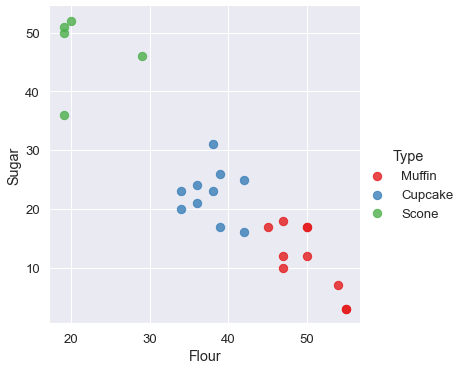

In [3]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});


Looks like scones have the least amount of flour and the most sugar

__Prepare the Data__

In [4]:
type_encoder = LabelEncoder()

type_encoder.fit(recipes['Type'].values)

#Econdes 'Type' column: 0 = Cupcake, 1 = Muffin, 2 = Scone
type_values = type_encoder.transform(recipes['Type'])


type_encoded = pd.DataFrame(type_values, columns=['Type_Encoded'])

recipes2 = pd.concat([recipes, type_encoded],axis=1)
recipes2.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,Type_Encoded
0,Muffin,55,28,3,7,5,2,0,0,1
1,Muffin,47,24,12,6,9,1,0,0,1
2,Muffin,47,23,18,6,4,1,0,0,1
3,Muffin,45,11,17,17,8,1,0,0,1
4,Muffin,50,25,12,6,5,2,1,0,1


#### Create Training and Test Data

In [5]:
X = recipes2.loc[:,['Flour','Sugar']]
y = recipes2.loc[:,'Type_Encoded'].values.ravel()

#Split the data into training and testing sets in a 85/15 split.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [6]:
features = recipes2.columns.values[1:9].tolist()
indices = [0,2]

feature_array = np.array(features)[indices]
dt_features = list(feature_array)
print(dt_features)

outcome = recipes2.columns[0]

outcome = np.unique(y)
print(outcome)



['Flour', 'Sugar']
[0 1 2]


__Fit the Model__

#### Model 1: SVM

In [7]:
# Fit the SVM model
svc_model = svm.SVC(kernel='linear', decision_function_shape='ovr')
svc_mode = svc_model.fit(X_train, y_train)

#support vectors for each class
print(svc_model.support_vectors_)

[[39. 26.]
 [42. 16.]
 [42. 25.]
 [45. 17.]
 [29. 46.]]


#### Model Results

In [8]:
#find the accuracy of the model
y_pred = svc_model.predict(X_test)
print("SVC Model Accuracy:",accuracy_score(y_test, y_pred))

SVC Model Accuracy: 1.0


__Predict New Case__

In [9]:
# Create a function to guess when a recipe is a muffin, cupcake or scone
def muffin_cupcake_or_scone(flour, sugar):
    if(svc_model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    elif (svc_model.predict([[flour,sugar]]))==1:
        print('You\'re looking at a cupcake recipe!')
    elif (svc_model.predict([[flour,sugar]]))==2:
        print('You\'re looking at a scone recipe!')

Test individual cases with dummy test values

In [10]:
# Predict if 22 parts flour and 51 parts sugar
muffin_cupcake_or_scone(22, 51)

You're looking at a scone recipe!


In [11]:
# Predict if 50 parts flour and 18 parts sugar
muffin_cupcake_or_scone(50,18)

You're looking at a cupcake recipe!


In [26]:
muffin_cupcake_dict = {'muffin_cupcake_model': svc_model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': X}

In [13]:
# Create a pickle to store svm model
pickle pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))
# pickle.dumps(muffin_cupcake_dict)

### Decision Tree Model

__Import Packages__

In [15]:
import os

# Packages for analysis
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
# pip install graphviz

In [16]:
X = recipes2.loc[:,['Flour','Sugar']]
y = recipes2.loc[:,'Type'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [17]:
features = recipes2.columns.values[1:9].tolist()
indices = [0,2]

feature_array = np.array(features)[indices]
dt_features = list(feature_array)
print(dt_features)

outcome = recipes2.columns[0]

outcome = np.unique(y)
print(outcome)



['Flour', 'Sugar']
['Cupcake' 'Muffin' 'Scone']


__Fit the Model__

#### Model 1: Decision Trees

In [28]:
#fit the decision tree using gini
tree_clf_gini = DecisionTreeClassifier(max_depth=3, random_state=42, criterion="gini")
tree_clf_gini = tree_clf_gini.fit(X_train,y_train)


graph_data = export_graphviz(tree_clf_gini, out_file=None, feature_names=dt_features, class_names=outcome, rounded=True, filled=True)
graph = graphviz.Source(graph_data)

graph = graphviz.Source(graph_data, format="png")

graph.render('decisiontree_gini')

'decisiontree_gini.png'

In [19]:
#fit the decision tree using entropy
tree_clf_entropy = DecisionTreeClassifier(max_depth=3, random_state=42, criterion="entropy")
tree_clf_entropy = tree_clf_entropy.fit(X_train,y_train)

graph_data = export_graphviz(tree_clf_entropy, out_file=None, feature_names=dt_features, class_names=outcome, rounded=True, filled=True)

graph = graphviz.Source(graph_data, format="png")

graph.render('decisiontree_entropy')


'decisiontree_entropy.png'

#### Model Results

In [20]:
#find the accuracy of the model
y_pred = tree_clf_gini.predict(X_test)
print("Decision Tree Gini Accuracy:",accuracy_score(y_test, y_pred))

y_pred = tree_clf_entropy.predict(X_test)
print("Decision Tree Entropy Accuracy:",accuracy_score(y_test, y_pred))

Decision Tree Gini Accuracy: 0.75
Decision Tree Entropy Accuracy: 0.75


In [24]:
muffin_cupcake_dict_tree = {'muffin_cupcake_model': [tree_clf_gini, tree_clf_entropy],  'muffin_cupcake_features': ["Four","Sugar"], 'all_features': X}

In [22]:
# Create a pickle to store decision tree model
pickle.dump(muffin_cupcake_dict_tree, open("muffin_cupcake_dict_tree.p", "wb"))
#pickle.dumps(muffin_cupcake_dict_tree)